In [10]:
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [11]:
XX = np.load('./X_medium.npy', allow_pickle=True)
yy = np.load('./y_medium.npy', allow_pickle=True)
np.nan_to_num(XX,0)

array([[ 7.23267436e-01,  9.76336300e-02,  3.12463820e-01, ...,
        -3.40898895e+01, -1.90405730e-01,  7.56735291e-02],
       [ 4.27478582e-01,  9.25289914e-02,  3.04185778e-01, ...,
        -2.65414467e+01,  3.31592578e-02, -1.66823928e-01],
       [ 5.37877202e-01,  8.07771459e-02,  2.84213215e-01, ...,
        -3.02505894e+01,  1.13161338e-01,  2.41499572e-01],
       ...,
       [ 3.03386003e-01,  6.09684065e-02,  2.46917814e-01, ...,
        -1.99380951e+01, -1.42457879e-01, -1.40062005e-01],
       [ 6.37709737e-01,  9.93302912e-02,  3.15167099e-01, ...,
        -3.25693130e+01,  1.16358214e-01,  4.11841093e-01],
       [ 4.59266275e-01,  4.83287238e-02,  2.19837949e-01, ...,
        -2.27927513e+01, -3.25676319e-02,  2.73381908e-01]])

In [12]:
X_train, X_test, y_train, y_test = train_test_split(XX, yy, test_size=0.2, random_state=42, stratify=yy)

scaler = StandardScaler(copy=False)
scaler.fit_transform(X_train)
scaler.transform(X_test)

array([[-0.70685344,  1.32939388,  1.25058546, ...,  1.16825281,
         1.04407595,  0.75324228],
       [-1.4190116 , -0.80475793, -0.74813996, ..., -1.25212323,
        -1.24905025,  0.6255148 ],
       [ 0.99537001, -0.61876315, -0.54210759, ...,  0.64237574,
         0.8353964 , -0.19213461],
       ...,
       [-1.66088298, -0.53876258, -0.45605102, ..., -1.3495053 ,
         1.12023544,  0.97458281],
       [-0.78637732, -0.17350725, -0.08032679, ..., -0.09308813,
         0.28738288, -0.35285303],
       [-0.0232475 ,  1.68776815,  1.53110151, ..., -1.32302608,
         2.04167354,  1.15486279]])

In [13]:
clf = SVC(kernel='rbf')
clf.fit(X_train, y_train)
score = clf.score(X_test, y_test)
score

0.6639311449159327

In [14]:
from sklearn.metrics import accuracy_score, classification_report

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 66.39%
Classification Report:
                     precision    recall  f1-score   support

              Blues       0.00      0.00      0.00        15
          Classical       0.79      0.77      0.78       124
            Country       1.00      0.03      0.06        35
     Easy Listening       0.00      0.00      0.00         4
         Electronic       0.63      0.84      0.72      1262
       Experimental       0.45      0.39      0.42       450
               Folk       0.65      0.64      0.65       304
            Hip-Hop       0.78      0.58      0.67       438
       Instrumental       0.56      0.40      0.47       270
      International       0.67      0.38      0.49       204
               Jazz       0.67      0.18      0.29        77
Old-Time / Historic       0.99      0.95      0.97       102
                Pop       0.52      0.05      0.09       237
               Rock       0.71      0.86      0.78      1419
           Soul-RnB       0.00      0.00    

C:\Users\ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ahmed\AppData\Roaming\Python\Python312\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} i

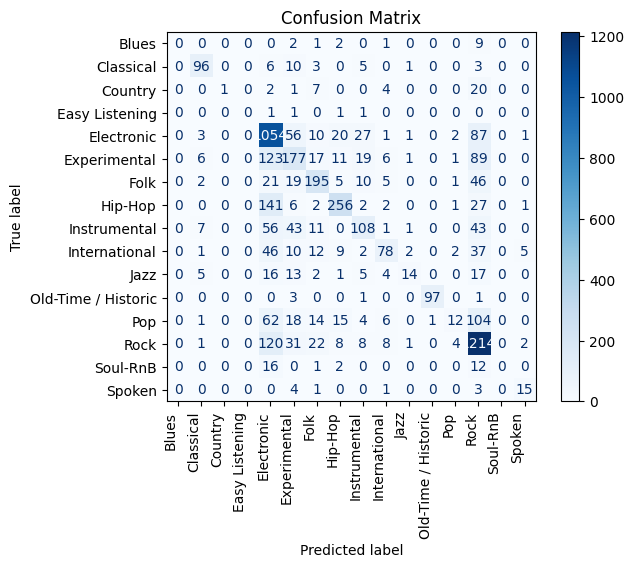

In [15]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

conf_matrix = confusion_matrix(y_test, y_pred)

class_names = ['Blues', 'Classical', 'Country', 'Easy Listening', 'Electronic', 'Experimental', 'Folk', 'Hip-Hop', 'Instrumental', 'International', 'Jazz', 'Old-Time / Historic', 'Pop', 'Rock', 'Soul-RnB', 'Spoken' ]
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_names)

disp.plot(cmap=plt.cm.Blues)
plt.xticks(rotation=90, ha='right')
plt.title("Confusion Matrix")
plt.show()


In [16]:
from joblib import dump
# Save model
dump(clf, 'models/svm_medium_model.joblib')

['models/svm_medium_model.joblib']

In [17]:
from datapreprosessing import*
def classify_genre(audio_path):
    
    features = extract_features(audio_path) 
    features = features.reshape(1, -1)
    genre= clf.predict(features)[0]
    return genre

d = classify_genre('fma_small/000/000002.mp3')
print(d)

Experimental
